#**Práctica 03.**  Regresión con perceptrones multicapa

Valeria González Baz





**Creación de redes neuronales usando pytorch**

**01. Ejercicio 1**

**Con los datos de este ejemplo buscamos crear una red neuronal que sea capaz de generar un error de cero (es decir, la linea de MLP atraviesa todos los puntos).**

1º Perceptrones multicapa (redes más sencillas)

`1.1. Trabajar con los datos`

In [ ]:
# Importamos las librerias que vamos a necesitar

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import torch

A las variables X e Y podemos llamarlas así o features (a la x) (datos de entrada), que serían por ejemplo las características o los atributos que describen los datos que estamos utilizando. E Y sería labels, es decir, el resultado que queremos predecir, la variable dependiente o salida del modelo
- **Features** (X o dato de entrada, VI): variables para predecir
- **Labels** (Y o dato de salida, VD): el resultado que queremos predecir

In [ ]:
# Generamos unos datos de X e y usando numpy

featuresX = np.array(
    [258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]
)[:, np.newaxis]

labelsY = np.array(
    [236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]
)


In [ ]:
# Comprobamos que se han creado bien

print(featuresX)
print(labelsY)


[[258.]
 [270.]
 [294.]
 [320.]
 [342.]
 [368.]
 [396.]
 [446.]
 [480.]
 [586.]]
[236.4 234.4 252.8 298.6 314.2 342.2 360.8 368.  391.2 390.8]


**X (features) es una matriz** de 10 filas y una columna. Cada fila representa un ejemplo (por ejemplo cada fila es una casa) y cada columna es una característica (representada por featuresX) -por ejemplo una caracteristica sería tamaño de la casa-. Cada fila es una casa y cada columna una caracteristica de la misma. Solo tenemos una columna porque featuresX lo hemos definido como un array unidimensional y luego lo hemos convertido en una matriz con [:, np.newaxis], creando una matriz con 10 filas y una columna. Y representa el valor objetivo que queremos que el modelo aprenda a predecir, por ejemplo el precio de cada una de las casas, por eso tenemos un vector de 10 elementos, porque cada uno es el precio de las casas de nuestro ejemplo de entrada.

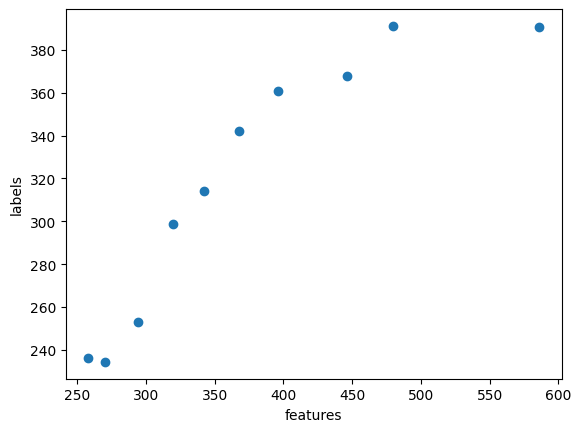

In [ ]:
# Ploteamos X e y

plt.scatter(featuresX, labelsY)
plt.xlabel("features")
plt.ylabel("labels")
plt.show()

In [ ]:
# Vamos a utilizar la funcion LinearRegression del paquete sklearn para calcular la recta a esos puntos

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(featuresX, labelsY)

# create predictions for plotting
X_range = np.arange(250, 600, 10)[:, np.newaxis] # de nuevo creamos una matrix nx1 en vez de un vector
y_linear = lr.predict(X_range)


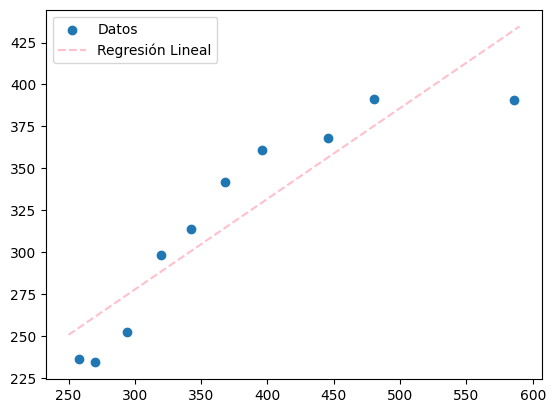

In [ ]:
# Dibujamos tanto los puntos como la recta

plt.scatter(featuresX, labelsY, label="Datos")
plt.plot(X_range, y_linear, label="Regresión Lineal", linestyle="--", color="pink")
plt.legend()
plt.show()

**1.2. Preparación de los datos**

- Modelo de regresión con MLP en Pytorch

**1. Normalización de los datos de entrada y salida.**

 - En Pytorch normalizamos tanto X como Y (aquí la capa de salida no suele tener una función de activación que reescale las predicciones). Una vez que tenemos el modelo entrenado (en Pytorch), reescalamos las predicciones a la escala original de Y para poder tener resultados interpretables.





In [ ]:
# preparamos los datos

from torch.utils.data import TensorDataset, DataLoader

# Normalizamos featuresX y labelsY para mejorar el rendimiento del modelo
# Calculamos la media y la desviación estándar de featuresX
x_mean, x_std = featuresX.mean(), featuresX.std()

# Calculamos la media y la desviación estándar de labelsY
y_mean, y_std = labelsY.mean(), labelsY.std()

# Normalizamos featuresX
Features_norm = (featuresX - x_mean) / x_std

# Normalizamos labelsY
Labels_norm = (labelsY - y_mean) / y_std


**2. Creamos un dataset iterable con tensores**

**2.1.** **Convertir los datos de NumPy a tensores de PyTorch**

**2.2.** **Crear un dataset con TensorDataset para que combina featuresX y labelsY**

**2.3.** **Hacer este dataset iterable**

Nuestros datos (FeaturesX y LabelsY) los tenemos en arrays de NumPy y tenemos que convertirlos a tensores de PyTorch mediante la función torch.Tensor para poder crear un dataset que combine los tensores de entrada (x) y salida (y), y la función DataLoader nos va a permitir crear un iterador sobre el dataset para poder acceder a los datos de entrenamiento uno por uno durante el entrenamiento de la red

In [ ]:
# 2.1. Convertimos los datos de NumPy a tensores de PyTorch

tensor_Features = torch.Tensor(Features_norm) # transform to torch tensor
tensor_Labels = torch.Tensor(Labels_norm)



In [ ]:
# Creamos un dataset con la función TensorDataset para combinar featuresX y labelsY


my_dataset = TensorDataset(tensor_Features,tensor_Labels) # create your datset con tensores de features y labels

In [ ]:
# Hacemos que nuestro dataset sea iterable

my_dataloader = DataLoader(my_dataset) # create your dataloader


**DEFINICIÓN DE LA RED**

Creamos una clase para definir la red neuronal. Dentro de esta clase (es como un molde), definimos la arquitectura de la red (las capas, sus dimensiones y como conectan entre sí), también definimos el flujo de los datos (definimos las funciones de activación).


In [ ]:
# Definimos la red como una clase, es lo recomendado
# vamos a crear una red con:
#   - Una entrada con las dimensiones de X
#   - Una capa oculta de 1 neurona
#   - Una de salida con una unica neurona sin activación


class MLP(torch.nn.Module): # Constructor de la clase, se ejecuta al crear una instancia de la clase.
    def __init__(self, X_nvars):
        super().__init__() # Llama al constructor de la clase padre (nn.Module).

 # Define las capas de la red usando nn.Sequential, que permite encadenar capas en orden.
        self.layers = torch.nn.Sequential(

            # Hidden Layer 1: Capa oculta con una neurona.
            torch.nn.Linear(X_nvars, 1), # Capa lineal que realiza una transformación lineal (sumatorio ponderado).
            torch.nn.ReLU(),              # Función de activación ReLU para introducir no linealidad.

            # output layer: Capa de salida con una neurona
            torch.nn.Linear(1, 1), #Capa lineal para la salida
        )                          # No se especifica función de activación, por lo que se usa la identidad (sin activación)

    def forward(self, x):   # Define cómo se propaga la entrada a través de la red.

        #Realiza una pasada hacia adelante (forward pass) a través de la red.

        #Args:
           # x (torch.Tensor): Tensor de entrada con las features.

        #Returns:
            #torch.Tensor: Tensor de salida con la predicción.

        output = self.layers(x) # Pasa la entrada a través de la secuencia de capas.
        return output       # Devuelve la salida de la red.


En este primer codigo lo que estamos haciendo es creando las capas (nn.Linear, nn.ReLu) directamente dentro de la llamada a nn.Sequential, es una forma de definir una secuencia de capas pero no nos deja poder asignar nombres descriptivos a las capas individuales.

En el segundo código (ambos hacen lo mismo), creamos las capas individualmente porque les he querido asignar nombres descriptivos (self.hidden_layer, self.activation, self.output_layer) y luego pasamos estos argumentos a nn.Sequential. Porque a medida que el codigo se vuelva más dificil es mejor tener nombres descriptivos para la comprensión y legibilidad.

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, X_nvars):
        super().__init__()

        # Capas con nombres más descriptivos
        self.hidden_layer = torch.nn.Linear(X_nvars, 1)
        self.activation = torch.nn.ReLU()
        self.output_layer = torch.nn.Linear(1, 1)

        # nn.Sequential con las capas nombradas
        self.layers = torch.nn.Sequential(
            self.hidden_layer,
            self.activation,
            self.output_layer,
        )

    def forward(self, x):
        output = self.layers(x)
        return output

In [ ]:
# MODIFICACIÓN DE LA ARQUITECTURA.
# Una capa de entrada con una neurona,
# 1 capa oculta con dos neuronas y función de activación ReLu,
# y una capa de salida con 1 neurona sin función de activación

class MLP(torch.nn.Module):
    def __init__(self, X_nvars):
        super().__init__() #super () se relaciona con llamar a la clase padre de la función definida como torch.nn.Module

        # Capa oculta con 2 neuronas y ReLU
        self.hidden_layer = torch.nn.Linear(X_nvars, 2)  #X_nvars sigue representando el numero de features de entrada, y el argumento 2 indica el número de neuronas en la capa oculta
        self.activation = torch.nn.ReLU()

        # Capa de salida con 1 neurona (sin función de activación)
        self.output_layer = torch.nn.Linear(2, 1)   #la capa de salida recibe 2 entradas y produce 1 salida. 2 neuronas de la capa anterior.

        # nn.Sequential con las capas nombradas
        self.layers = torch.nn.Sequential(
            self.hidden_layer,
            self.activation,
            self.output_layer,
        )

    def forward(self, x):
        output = self.layers(x)
        return output




CREAMOS LA RED Y DEFINIMOS HIPERPARÁMETROS

1.   Fijamos la semilla para reproducibilidad
2.   Creamos una instancia del modelo de red neuronal MLP
3. Definimos la función de pérdida como MSE
4. Elegimos el optimizador como SGD con una tasa de aprendizaje de 0.1



In [ ]:
# Fijamos la semilla a un valor para que los resultados sean identicos
torch.manual_seed(1)

# Ahora fijamos algunos hiper-parámetros

# Creamos el modelo MLP
model = MLP(X_nvars=1)

# Definimos la función loss
loss_fn = torch.nn.MSELoss()

# Elegimos el optimizador
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


ENTRENAMIENTO DE LA RED

In [ ]:
import torch.nn.functional as F

# Fijamos el número de épocas o iteraciones
num_epochs = 500

# Una variables donde vamos a ir guardando los valores del loss para ploterarlos
loss_history = []

for epoch in range(num_epochs): # Bucle para iterar sobre las épocas
    model = model.train() # se fijan algunas cosas para hacer entrenamiento

    # En esta parte se define el batch
    # No te preocupes que aún no sabemos qué es
    # MUY IMPORTANTE, nunca uses el mismo nombre que tus datos o los sobreescribe
    for batch_idx, (featuresN, targetsN) in enumerate(my_dataloader):

        output = model(featuresN)            # Hacemos el forward. Se hace una predicción con el modelo
        loss = loss_fn(output, targetsN)     # Calculamos el loss. Se calcula la pérdida

        optimizer.zero_grad()        # Se ponen a cero los gradientes del optimizador
        loss.backward()              # Calculamos los gradientes (la derivada del loss)
        optimizer.step()             # Se actualizan los pesos del modelo


        # Cada cierto tiempo vamos a imprimir un poco de información
        # para saber qué está pasando
        if not batch_idx % 100:
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                # f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Batch {batch_idx:03d}/{len(my_dataloader):03d}"
                f" | Train Loss: {loss.item():.2f}"
            )
        # añadimos el loss a loss_history
    loss_history.append(loss.item())    # Se guarda la pérdida en loss_history


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 001/500 | Batch 000/010 | Train Loss: 2.88
Epoch: 002/500 | Batch 000/010 | Train Loss: 4.10
Epoch: 003/500 | Batch 000/010 | Train Loss: 3.87
Epoch: 004/500 | Batch 000/010 | Train Loss: 3.37
Epoch: 005/500 | Batch 000/010 | Train Loss: 2.35
Epoch: 006/500 | Batch 000/010 | Train Loss: 1.14
Epoch: 007/500 | Batch 000/010 | Train Loss: 0.33
Epoch: 008/500 | Batch 000/010 | Train Loss: 0.05
Epoch: 009/500 | Batch 000/010 | Train Loss: 0.00
Epoch: 010/500 | Batch 000/010 | Train Loss: 0.01
Epoch: 011/500 | Batch 000/010 | Train Loss: 0.01
Epoch: 012/500 | Batch 000/010 | Train Loss: 0.01
Epoch: 013/500 | Batch 000/010 | Train Loss: 0.01
Epoch: 014/500 | Batch 000/010 | Train Loss: 0.01
Epoch: 015/500 | Batch 000/010 | Train Loss: 0.01
Epoch: 016/500 | Batch 000/010 | Train Loss: 0.00
Epoch: 017/500 | Batch 000/010 | Train Loss: 0.00
Epoch: 018/500 | Batch 000/010 | Train Loss: 0.00
Epoch: 019/500 | Batch 000/010 | Train Loss: 0.00
Epoch: 020/500 | Batch 000/010 | Train Loss: 0.00


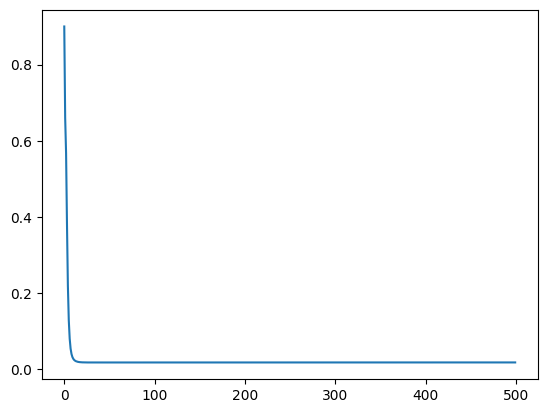

In [ ]:
# Vamos a hacer un plot del loss, a ver qué ha pasado

plt.plot(loss_history)


In [ ]:
# Vamos a evaluar el funcionamiento del modelo

model.eval() # Se pone el modelo en modo de evaluación

# predecimos los valores del rango X_range segun el MLP

# Se pasan a un tensor normalizado. Se normalizan los datos de entrada X_range
X_range_norm = (X_range - x_mean) / x_std
X_range_norm = torch.tensor(X_range_norm, dtype=torch.float32)

# Se pasan los datos normalizados al modelo para obtener las predicciones
y_mlp_norm = model(X_range_norm)

# Se desnormalizan las predicciones para que estén en la misma escala que los datos originales
y_mlp_norm = y_mlp_norm.detach().numpy().astype(np.float64) # Se convierten las predicciones a un array de NumPy
y_mlp = y_mlp_norm * y_std + y_mean # Se desnormalizan las predicciones


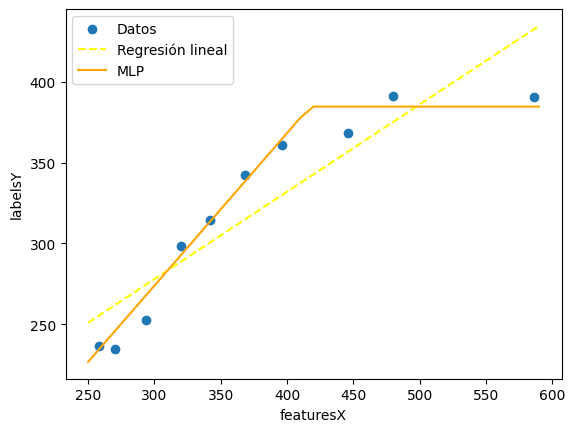

In [ ]:
# Vamos a hacer un plot con los resultados

# Los datos originales
plt.scatter(featuresX, labelsY, label="Datos")

# Los datos predichos por la regresion lineal
plt.plot(X_range, y_linear, label="Regresión lineal", linestyle="--", color='yellow')

# Los datos predichos por el MLP
plt.plot(X_range, y_mlp, label="MLP", color='orange')

plt.xlabel("featuresX")
plt.ylabel("labelsY")
plt.legend()
plt.show()


# **¿Qué modificar para generar un error de 0?**

> Experimentar con diferentes ajustes;




**1.   Modificar arquitectura de red**


- Aumentar la complejidad de la red (más capas ocultas o más neuronas), para que se ajuste más a los puntos.
- Probar diferentes funciones de activación en las capas ocultas (la función de activación influye en la capacidad de la red para aprender patrones en los datos)

**2. Modificar hiperparámetros del entrenamiento**

- Aumentar el número de épocas (puede hacer que la red se ajuste más a los datos, aunque aumenta el riesgo de sobreajuste)
- Ajustar la tasa de aprendizaje. Esto controla la velocidad a la que se actualizan los pesos de la red durante el entrenamiento.
- La elección del optimizador (en el ejemplo usábamos SGD) también puede influir en la velocidad y en la estabilidad del entrenamiento

**3. Regularización**
- Técnica para evitar el sobreajuste. Regularización L1 o L2 a la función de pérdida para penalizar los pesos grandes y fomentar soluciones simples



Después de cada cambio tenemos que evaluar el modelo para ver si el error se ha reducido. Y así vamos experimentando con diferentes configuraciones hasta lograr un error de cero (o lo más cercano)

# **02. Ejercicio 2**

Usando el código siguiente, construye un MLP que se ajuste razonablemente a los puntos de ese seno. Puedes jugar con la creación de datos.



(100,)
(100,)


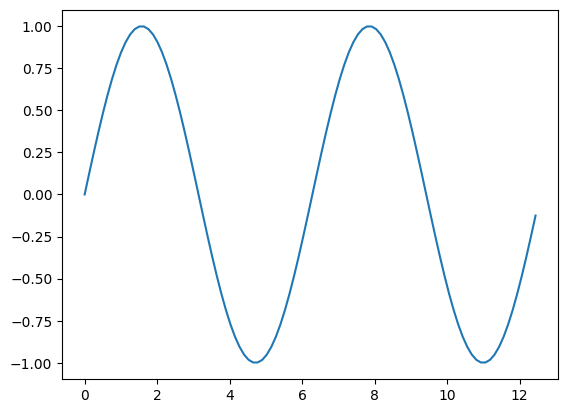

In [ ]:
# Creamos los datos, en este caso un seno

import numpy as np

cycles = 2  # numero de periodos
n = 100     # numero de datos en x

length = 2 * np.pi * cycles # esto es la longitud total del intervalo en el que se generarán los datos. Como un ciclo completo de la onda del seno abarca 2π radianes, multiplicar por cycles permite generar la longitud para el número deseado de ciclos.

x = np.arange(0, length, length / n) #secuencia de valores dentro del rango
y = np.sin(x) #función seno

plt.plot(x, y, '-')

print(x.shape)
print(y.shape)


In [ ]:
# 2. Preparamos los datos (reutilizar código ejercicio anterior)
# Convertimos a tensores de PyTorch

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # unsqueeze para añadir una dimensión
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# 3. Creamos un dataset y un dataloader

dataset = TensorDataset(x_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  # Tamaño de bach???



In [ ]:
import torch.nn as nn

In [ ]:
# 4. Podemos definir la arquitectura de la red

class SineMLP(nn.Module):
    def __init__(self):
        super(SineMLP, self).__init__()
        self.layer1 = nn.Linear(1, 32)  # Ajustar aquí el número de neuronas
        self.layer2 = nn.Linear(32, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x)) # ReLU en la segunda capa
        x = self.layer3(x)
        return x

In [ ]:
import torch.optim as optim

In [ ]:
# 5. Creamos el modelo, función de pérdida y optimizador

model = SineMLP()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # lr, igual que en el ejercicio anterior lo podemos ajustar


In [ ]:
# 6. Entrenar la red neuronal
num_epochs = 600  # Ajusta el número de épocas
loss_history = []

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(dataloader):
        output = model(data)
        loss = loss_fn(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    # elegir cual es el que quiero:  print(
         #       f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
         #      f" | Batch {batch_idx:03d}/{len(my_dataloader):03d}"
         #       f" | Train Loss: {loss.item():.2f}"
         #   )


Epoch [1/600], Loss: 0.0591
Epoch [2/600], Loss: 0.3853
Epoch [3/600], Loss: 0.1807
Epoch [4/600], Loss: 0.2386
Epoch [5/600], Loss: 0.2339
Epoch [6/600], Loss: 0.6952
Epoch [7/600], Loss: 0.7360
Epoch [8/600], Loss: 0.0887
Epoch [9/600], Loss: 0.5932
Epoch [10/600], Loss: 0.2449
Epoch [11/600], Loss: 0.1731
Epoch [12/600], Loss: 0.0238
Epoch [13/600], Loss: 0.2412
Epoch [14/600], Loss: 0.4820
Epoch [15/600], Loss: 0.1827
Epoch [16/600], Loss: 0.2673
Epoch [17/600], Loss: 0.1293
Epoch [18/600], Loss: 0.4210
Epoch [19/600], Loss: 0.7454
Epoch [20/600], Loss: 0.1643
Epoch [21/600], Loss: 0.7235
Epoch [22/600], Loss: 0.1218
Epoch [23/600], Loss: 0.0478
Epoch [24/600], Loss: 0.2570
Epoch [25/600], Loss: 0.1081
Epoch [26/600], Loss: 0.4336
Epoch [27/600], Loss: 0.2891
Epoch [28/600], Loss: 0.5662
Epoch [29/600], Loss: 0.2131
Epoch [30/600], Loss: 0.3763
Epoch [31/600], Loss: 0.4863
Epoch [32/600], Loss: 0.7355
Epoch [33/600], Loss: 0.2605
Epoch [34/600], Loss: 0.4251
Epoch [35/600], Loss: 0

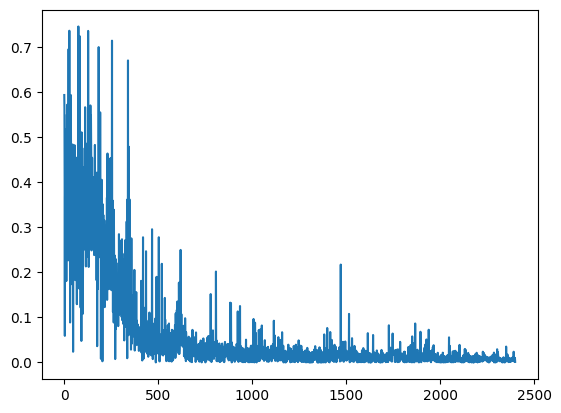

In [ ]:
# Vamos a hacer un plot del loss, a ver qué ha pasado

plt.plot(loss_history)

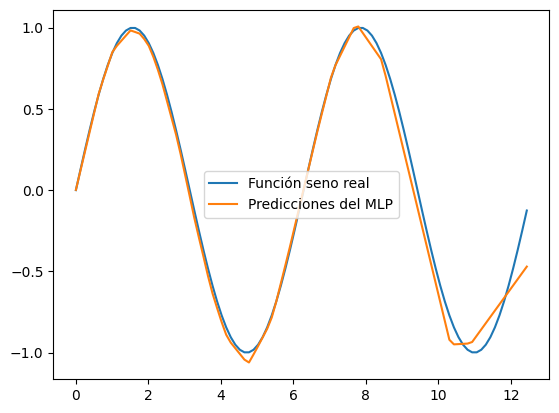

In [ ]:
# 7. Evaluar el modelo (visualización)

with torch.no_grad():  # No calcular gradientes durante la evaluación (ahorra memoria)
    predictions = model(x_tensor)  # Obtener predicciones del modelo para todos los valores de x en el conjunto de datos original (x_tensor)

# Visualizar los resultados. Se grafican las predicciones junto a los valores reales de la función seno (y), así comparamos graficamente el ajuste
plt.plot(x, y, label="Función seno real")
plt.plot(x, predictions.numpy(), label="Predicciones del MLP")
plt.legend()
plt.show()

Para tener una medida numérica del error del modelo (a parte de visualizar las predicciones y compararlas con la función real), podemos calcular el error (MSE, error cuadrático promedio, aunque también podriamos usar RMSE para que sea más fácil de interpretar) y asi tenemos una medida que sea cuantitativa del rendimiento

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, predictions.numpy())
print(f"Error cuadrático medio (MSE): {mse:.4f}")

Error cuadrático medio (MSE): 0.0056


# **03. Ejercicio 3**

Regresión con datos de felicidad

Se analizan unos datos obtenido de Kaggle.com sobre la encuesta de felicidad de 2021: enlace

Una vez limpiados y preparados la base de datos consta de 9 variables predictoras y una variable criterio:

Criterio: Life.Ladder.

Predictoras: year, Log.GDP.per.capita, Social.support, Healthy.life.expectancy.at.birth, Freedom.to.make.life.choices, Generosity, Perceptions.of.corruption, Positive.affect, Negative.affect.

Identificar cuáles de las 9 variables predictoras son realmente importantes para predecir el nivel de felicidad es un paso crucial en el análisis de datos y en la construcción de un modelo predictivo. Existen diversas técnicas para determinar la importancia de las variables:
1. Análisis de correlación:
Calcula la correlación entre cada variable predictora y la variable criterio (Life.Ladder).
Una correlación alta (positiva o negativa) indica una relación fuerte entre las variables, lo que sugiere que la variable predictora podría ser importante para la predicción.
Limitación: La correlación solo captura relaciones lineales. Puede haber relaciones no lineales que no se detecten con este método.
2. Feature Importance (Importancia de las características):
Muchos algoritmos de aprendizaje automático, como los árboles de decisión y los bosques aleatorios, tienen métodos incorporados para calcular la importancia de las características.
Estos métodos asignan una puntuación a cada característica en función de su contribución a la precisión del modelo.
Las características con puntuaciones más altas son consideradas más importantes para la predicción.
3. Selección de características (Feature Selection):
Técnicas que seleccionan automáticamente un subconjunto de las características más relevantes para la predicción.
Métodos de filtro: Utilizan métricas estadísticas (como la correlación) para seleccionar las características.
Métodos envolventes (wrapper): Utilizan el rendimiento del modelo para evaluar la importancia de las características.
Métodos embebidos (embedded): Incorporan la selección de características como parte del proceso de entrenamiento del modelo.
4. Visualización:
Gráficos como diagramas de dispersión o gráficos de barras pueden ayudar a visualizar la relación entre las variables predictoras y la variable criterio.
Esto puede proporcionar información sobre la importancia de las variables y la forma de la relación.
5. Conocimiento del dominio:
El conocimiento experto sobre el tema puede ser muy útil para identificar las variables que son más relevantes para la predicción.
Consultar con expertos o revisar la literatura científica puede proporcionar información valiosa sobre las variables que influyen en la felicidad.
En la práctica:
Es recomendable utilizar una combinación de estas técnicas para obtener una comprensión más completa de la importancia de las variables.
Ejemplo:
Podrías:
Calcular la correlación entre cada variable predictora y Life.Ladder.
Entrenar un modelo de bosque aleatorio y obtener la importancia de las características.
Visualizar la relación entre las variables utilizando gráficos.




In [ ]:
# 1. Importar librerías y cargar los datos

import numpy as np
import matplotlib.pyplot as plt
import sklearn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd

# cargar los datos

url = 'https://raw.githubusercontent.com/mcstllns/UNIR2024/main/data-happiness.csv' #archivo csv con los datos de la encuesta
data  = pd.read_csv(url) #función de la libreria pandas para leer el archivo desde la url y guardarlo en un data frame, que lo llamamos Data
print(data.keys()) #imprime los nombres de las columnas (variables)
data.head()




Index(['year', 'Life.Ladder', 'Log.GDP.per.capita', 'Social.support',
       'Healthy.life.expectancy.at.birth', 'Freedom.to.make.life.choices',
       'Generosity', 'Perceptions.of.corruption', 'Positive.affect',
       'Negative.affect'],
      dtype='object')


,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
# 2. Limpiamos y preparamos los datos

# El fichero tiene datos perdidos y hay que eliminar las filas
data = data.dropna()

# Creamos conjuntos X e y (las variables que usaremos para predecir y la variable que queremos predecir)
Features_X = data.drop('Life.Ladder', axis=1) # nuevo data frame que tiene las columnas del data frame original pero sin la columna 'life.ladder', esta va a ser la matriz de variables predictoras (features). Axis=1 indica que se está eliminando una columna
Target_Y = data['Life.Ladder'] #solo la columna 'Life.ladder'

print(Features_X.head()) # Muestra las primeras filas de las features
print(Target_Y.head()) # Muestra las primeras filas del target

   year  Log.GDP.per.capita  Social.support  Healthy.life.expectancy.at.birth  \
0  2008               7.370           0.451                             50.80   
1  2009               7.540           0.552                             51.20   
2  2010               7.647           0.539                             51.60   
3  2011               7.620           0.521                             51.92   
4  2012               7.705           0.521                             52.24   

   Freedom.to.make.life.choices  Generosity  Perceptions.of.corruption  \
0                         0.718       0.168                      0.882   
1                         0.679       0.190                      0.850   
2                         0.600       0.121                      0.707   
3                         0.496       0.162                      0.731   
4                         0.531       0.236                      0.776   

   Positive.affect  Negative.affect  
0            0.518            

In [ ]:
# 3. preparamos los datos

from torch.utils.data import TensorDataset, DataLoader #importamos las clases TensorDataset y DataLoader del módulo torch.utils.data

# Normalizamos X e y, para que las variables predictoras y objetivo tengan una escala similar
x_mean, x_std = Features_X.mean(), Features_X.std()
y_mean, y_std = Target_Y.mean(), Target_Y.std()

X_norm = (Features_X - x_mean) / x_std
y_norm = (Target_Y - y_mean) / y_std

# Pasamos las variables a tensores (estructura principal de de datos utilizada por PyTorch)
# Ojo, como son dataframes de pandas la sintaxis es un poco diferente (.values se utiliza para acceder a los valores numéricos del DataFrame de pandas.)

tensor_X = torch.from_numpy(X_norm.values).float()
tensor_y = torch.from_numpy(y_norm.values).float()

# Creamos el dataset y el dataloader
my_dataset = TensorDataset(tensor_X,tensor_y) # combinamos las variables tanto predictoras como objetivo en un único conjunto de datos
my_dataloader = DataLoader(my_dataset, batch_size=32) # para iterar sobre el conjunto de datos en batches durante el entrenamiento


In [ ]:

print(tensor_X.shape) #esto nos dice que tenemos 1708 filas (observaciones, ejemplos) en el conjunto de datos, y cada observación tiene 9 características o variables predictoras
print(tensor_y.shape) # esto nos dice que tenemos 1708 valores para la variable objetivo (felicidad), uno para cada observación

torch.Size([1708, 9])
torch.Size([1708])


La forma del tensor de entrada determina la arquitectura de la primera capa de la red neuronal (específicamente del número de neuronas de entrada que debe tener esa capa), porque esta primera cada es la que recibe los datos de entrada y debe ser capaz de procesarlos. En este caso el tensor, al ser de forma [1708, 9], quiere decir que cada observación en los datos se representa por un vector de 9 características, y por esta razón, para que la primera capa pueda procesar estos vectores de entrada, debe tener 9 neuronas de entrada para que reciba el valor de una caracteristica (al aumentar neuronas ganamos capacidad de modelar relaciones no lineales).

El mejor modelo calculado con estadística convencional (modelo lineal) da un MSE de 0.235

Supera el MSE de la regresión múltiple

# **4. Definición de la arquitectura de la red.**

1º Prueba:
- capa de entrada con 9 neuronas (para recibir las 9 características de entrada (features).
- capa oculta con tres neuronas, utilizando la función de activación ReLu
- capa de salida con una neurona para predecir la felicidad (target), no utilizamos función de activación en la capa de salida (problema de regresión)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__() #super () se relaciona con llamar a la clase padre de la función definida como torch.nn.Module

        # Capa oculta con x neuronas y ReLU
        self.hidden_layer1 = nn.Linear(input_size, 8)
        self.activation1 = nn.ReLU()
        self.hidden_layer2 = nn.Linear(8, 6)  # Segunda capa oculta con x neuronas
        self.activation2 = nn.ReLU()

        # Capa de salida con 1 neurona (sin función de activación)
        self.output_layer = nn.Linear(6, 1)   #la capa de salida recibe x entradas (según las neuronas de la capa anterior) y produce 1 salida.

        # nn.Sequential con las capas nombradas
        self.layers = nn.Sequential(
            self.hidden_layer1,
            self.activation1,
            self.hidden_layer2,
            self.activation2,
            self.output_layer,
        )

    def forward(self, x):
        output = self.layers(x)
        return output



Ahora definimos la función de pérdida y el optimizador, y fijamos la semilla para reproducibilidad

In [ ]:
# Fijamos la semilla a un valor para que los resultados sean identicos
torch.manual_seed(1)

# Ahora fijamos algunos hiper-parámetros

# Creamos el modelo MLP
model = MLP(input_size=9).float()  # 9 caracteristicas de entrada (features). Convertimos el modelo a Float

# Definimos la función loss
loss_fn = torch.nn.MSELoss().float() # Convertimos la función de pérdida a Float

# Elegimos el optimizador
optimizer = optim.Adam(model.parameters(), lr=0.01) # Cambiar el optimizador a Adam y ajustar lr



# **Entrenamos la red**

In [ ]:
# Definimos hiperparámetros

import torch.nn.functional as F

# Fijamos el número de épocas o iteraciones
num_epochs = 500

# Una variables donde vamos a ir guardando los valores del loss para ploterarlos
loss_history = []



Problemas que surgen en el bucle de entrenamiento:
- Después de unos pocos batches aparece el NaN (posible problema relacionado con la tasa de aprendizaje o la inicialización de los pesos).
1º Intento: reducir la tasa de aprendizaje (de 0.1 a 0.01)

- Consigo eliminar el nann reduciendo la tasa de aprendizaje pero no es buena, da muchos saltos y no converge

2º Intento: Cambiamos el optimizador de SGL a Adam, sigo con la tasa de aprendizaje a 0.01 y ajusto el tamaño del batch a 32

In [ ]:
# Bucle de entrenamiento

for epoch in range(num_epochs): # Bucle para iterar sobre las épocas
    model.train()

    # Bucle de batches

    for batch_idx, (batch_features, batch_targets) in enumerate(my_dataloader):

        # Procesar cada batch

        output = model(batch_features.float()).squeeze()           # Tengo que convertir el tensor a tipo Float porque me daba error (tenía diferentes tipos de datos en los tensores, uno double y otro float) Hacemos el forward. Se hace una predicción con el modelo
        loss = loss_fn(output, batch_targets)    # Calculamos el loss. Se calcula la pérdida

        optimizer.zero_grad()        # Se ponen a cero los gradientes del optimizador
        loss.backward()              # Calculamos los gradientes (la derivada del loss)
        optimizer.step()             # Se actualizan los pesos del modelo


       # Imprimir información

        if not batch_idx % 100:
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                # f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Batch {batch_idx:03d}/{len(my_dataloader):03d}"
                f" | Train Loss: {loss.item():.2f}"
            )

        # Almacenar la pérdida

    loss_history.append(loss.item())    # Se guarda la pérdida en loss_history


Epoch: 001/500 | Batch 000/054 | Train Loss: 0.88
Epoch: 002/500 | Batch 000/054 | Train Loss: 0.20
Epoch: 003/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 004/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 005/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 006/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 007/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 008/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 009/500 | Batch 000/054 | Train Loss: 0.23
Epoch: 010/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 011/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 012/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 013/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 014/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 015/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 016/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 017/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 018/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 019/500 | Batch 000/054 | Train Loss: 0.24
Epoch: 020/500 | Batch 000/054 | Train Loss: 0.24


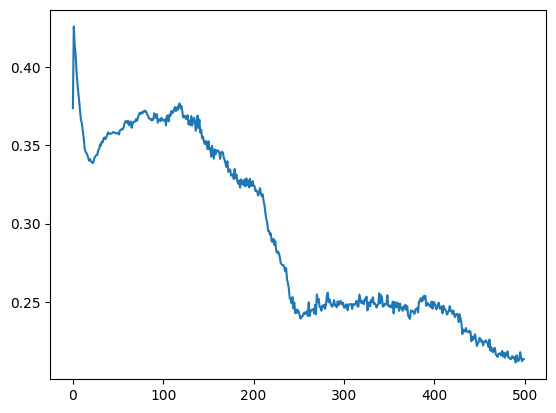

In [ ]:
# Vamos a hacer un plot del loss, a ver qué ha pasado

plt.plot(loss_history)

In [ ]:
# Vamos a evaluar el funcionamiento del modelo
model.eval()  # Se pone el modelo en modo de evaluación

# Obtener las predicciones para los datos de entrenamiento (tensor_X)
with torch.no_grad():  # No calcular gradientes durante la evaluación
    predictions = model(tensor_X)

# Desnormalizar las predicciones
predictions_desnorm = predictions.detach().numpy().squeeze() * y_std + y_mean

# Calcular el MSE
from sklearn.metrics import mean_squared_error
mse_mlp = mean_squared_error(Target_Y, predictions_desnorm)
print(f"MSE del modelo MLP: {mse_mlp:.4f}")

# Comparar con el MSE del modelo lineal (0.235)
if mse_mlp < 0.235:
    print("El modelo MLP ha superado al modelo lineal en términos de MSE.")
else:
    print("El modelo MLP no ha superado al modelo lineal en términos de MSE.")

MSE del modelo MLP: 0.2091
El modelo MLP ha superado al modelo lineal en términos de MSE.


Resumen : ¿Qué he hecho?
Entrenar un modelo MLP para predecir el nivel de felicidad utilizando 9 variables predictoras
- Inicialmente el modelo presentaba problemas de convergencia, con un train loss fluctuante y valores NaN
- Se realizaron ajustes como cambiar el optimizador a Adam, reducir la tasa de aprendizaje y ajustar el tamaño del batch, mejorando el comportamiento del loss
- Aun así el modelo no sueperaba el MSE del modelo lineal convencional
- También se ha probado con una modificación del número de neuronas en la capa oculta, pero no ha modificado significativamente el rendimiento

**3.1. Forma alternativa de encontrar la mejor arquitectura**

Definir una lista (esta es hidden_layer_configs) con las diferentes configuraciones de capas ocultas a probar.

Inicializamos el mejor MSE con infinito y la mejor configuración con None

Iteramos sobre las configuraciones de capas ocultas y para cada configuración se define la clase del modelo MLP con la configuración actual

Se crea el modelo con la configuración, definición de la función de pérdida y optimizador

Entrenamiento del modelo

Evaluacion y calculo del MSE. Si el MSE es menor que el mejor MSE encontrado hasta el momento, se guarda la configuración actual como la mejor configuración y se actualiza el mejor MSE. Al terminar el bucle lo que se imprime es la mejor configuración y el mse

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.metrics import mean_squared_error

# Cargar los datos
url = 'https://raw.githubusercontent.com/mcstllns/UNIR2024/main/data-happiness.csv'
data  = pd.read_csv(url)
data = data.dropna()

# Crear conjuntos X e y
Features_X = data.drop('Life.Ladder', axis=1)
Target_Y = data['Life.Ladder']

# Normalizar X e y
x_mean, x_std = Features_X.mean(), Features_X.std()
y_mean, y_std = Target_Y.mean(), Target_Y.std()
X_norm = (Features_X - x_mean) / x_std
y_norm = (Target_Y - y_mean) / y_std

# Convertir a tensores
tensor_X = torch.from_numpy(X_norm.values).float()
tensor_y = torch.from_numpy(y_norm.values).float()

# Crear el dataset y el dataloader
my_dataset = TensorDataset(tensor_X,tensor_y)
my_dataloader = DataLoader(my_dataset, batch_size=32)

# Define una lista de configuraciones de capas ocultas
hidden_layer_configs = [
    [4],  # Una capa oculta con 4 neuronas
    [8],  # Una capa oculta con 8 neuronas
    [4, 2],  # Dos capas ocultas con 4 y 2 neuronas respectivamente
    [8, 4],  # Dos capas ocultas con 8 y 4 neuronas respectivamente
    # ... agrega más configuraciones aquí ...
]

best_mse = float('inf')  # Inicializa el mejor MSE con infinito
best_config = None

# Itera sobre las configuraciones de capas ocultas
for config in hidden_layer_configs:
    # Define la clase del modelo con la configuración actual
    class MLP(nn.Module):
        def __init__(self, input_size, hidden_sizes):
            super().__init__()
            layers = []
            in_size = input_size
            for hidden_size in hidden_sizes:
                layers.append(nn.Linear(in_size, hidden_size))
                layers.append(nn.ReLU())
                in_size = hidden_size
            layers.append(nn.Linear(in_size, 1))
            self.layers = nn.Sequential(*layers)

        def forward(self, x):
            output = self.layers(x)
            return output

    # Crea el modelo con la configuración actual
    model = MLP(input_size=9, hidden_sizes=config).float()

    # Define la función de pérdida y el optimizador
    loss_fn = nn.MSELoss().float()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Entrena el modelo
    num_epochs = 300
    for epoch in range(num_epochs):
        model.train()
        for batch_idx, (batch_features, batch_targets) in enumerate(my_dataloader):
            output = model(batch_features).squeeze()
            loss = loss_fn(output, batch_targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # if not batch_idx % 100:
            #     print(f"Epoch: {epoch+1:03d}/{num_epochs:03d} | Batch {batch_idx:03d}/{len(my_dataloader):03d} | Train Loss: {loss.item():.4f}")

    # Evalúa el modelo y calcula el MSE
    model.eval()
    with torch.no_grad():
        predictions = model(tensor_X)
    predictions_desnorm = predictions.detach().numpy().squeeze() * y_std + y_mean
    mse = mean_squared_error(Target_Y, predictions_desnorm)

    # Guarda la mejor configuración si el MSE es menor
    if mse < best_mse:
        best_mse = mse
        best_config = config

# Imprime la mejor configuración y el MSE
print(f"Mejor configuración: {best_config}")
print(f"Mejor MSE: {best_mse:.4f}")


Mejor configuración: [8]
Mejor MSE: 0.2299


Tras generar un código que encuentra la mejor arquitectura para el modelo MLP, (entre las probadas), esta es la que tiene (según la salida obtenida), una capa oculta con 8 neuronas, logrando con esta arquitectura un MSE de 0.229 en los datos de entrenamiento(las predicciones del modelo se desvían de los valores reales en aproximadamente 0.229 unidades), consiguiendo así un error cuadrático medio menor al que se obtiene con el modelo lineal en la prediccion del nivel de felicidad.





# **Mejor modelo:**

In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.metrics import mean_squared_error
import optuna


# Cargar los datos
url = 'https://raw.githubusercontent.com/mcstllns/UNIR2024/main/data-happiness.csv'
data = pd.read_csv(url)
data = data.dropna()

# Crear conjuntos X e y
Features_X = data.drop('Life.Ladder', axis=1)
Target_Y = data['Life.Ladder']

# Normalizar X e y
x_mean, x_std = Features_X.mean(), Features_X.std()
y_mean, y_std = Target_Y.mean(), Target_Y.std()
X_norm = (Features_X - x_mean) / x_std
y_norm = (Target_Y - y_mean) / y_std

# Convertir a tensores
tensor_X = torch.from_numpy(X_norm.values).float()
tensor_y = torch.from_numpy(y_norm.values).float()

# Crear el dataset y el dataloader
my_dataset = TensorDataset(tensor_X, tensor_y)
my_dataloader = DataLoader(my_dataset, batch_size=32)


def objective(trial):
    # Define la arquitectura de la red neuronal con Optuna
    n_layers = trial.suggest_int("n_layers", 1, 3)  # Número de capas ocultas
    layers = []
    in_features = 9  # Número de características de entrada
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 64)  # Número de neuronas en la capa oculta
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        in_features = out_features
    layers.append(nn.Linear(in_features, 1))  # Capa de salida
    model = nn.Sequential(*layers)

    # Define el optimizador con Optuna
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    # Entrena el modelo
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for batch_idx, (batch_features, batch_targets) in enumerate(my_dataloader):
            output = model(batch_features).squeeze()
            loss = nn.MSELoss()(output, batch_targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evalúa el modelo y calcula el MSE
    model.eval()
    with torch.no_grad():
        predictions = model(tensor_X)
    predictions_desnorm = predictions.detach().numpy().squeeze() * y_std + y_mean
    mse = mean_squared_error(Target_Y, predictions_desnorm)

    return mse  # Optuna minimizará este valor


# Crea un estudio de Optuna
study = optuna.create_study(direction="minimize")

# Optimiza la función objetivo
study.optimize(objective, n_trials=100)  # Número de ensayos

# Imprime los mejores hiperparámetros y el mejor valor de la función objetivo
print("Mejores hiperparámetros:", study.best_params)
print("Mejor valor de la función objetivo (MSE):", study.best_value)

[I 2025-02-16 00:16:23,615] A new study created in memory with name: no-name-f6820097-a2bc-414c-b57a-d97da647925c
[I 2025-02-16 00:16:34,887] Trial 0 finished with value: 1.190172972823652 and parameters: {'n_layers': 2, 'n_units_l0': 45, 'n_units_l1': 25, 'optimizer': 'SGD', 'lr': 1.4442101542010153e-05}. Best is trial 0 with value: 1.190172972823652.
[I 2025-02-16 00:16:45,511] Trial 1 finished with value: 0.11923403670081899 and parameters: {'n_layers': 2, 'n_units_l0': 50, 'n_units_l1': 19, 'optimizer': 'Adam', 'lr': 0.001997115607165631}. Best is trial 1 with value: 0.11923403670081899.
[I 2025-02-16 00:16:52,015] Trial 2 finished with value: 0.3021051359856913 and parameters: {'n_layers': 1, 'n_units_l0': 11, 'optimizer': 'SGD', 'lr': 0.0003664649133785504}. Best is trial 1 with value: 0.11923403670081899.
[I 2025-02-16 00:17:00,015] Trial 3 finished with value: 0.18211119755612784 and parameters: {'n_layers': 1, 'n_units_l0': 57, 'optimizer': 'Adam', 'lr': 0.0012643693421517247}

Mejores hiperparámetros: {'n_layers': 2, 'n_units_l0': 59, 'n_units_l1': 49, 'optimizer': 'Adam', 'lr': 0.0034990554729228567}
Mejor valor de la función objetivo (MSE): 0.07954812964496606


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__() #super () se relaciona con llamar a la clase padre de la función definida como torch.nn.Module

        # Capa oculta con x neuronas y ReLU
        self.hidden_layer1 = nn.Linear(input_size, 59)
        self.activation1 = nn.ReLU()
        self.hidden_layer2 = nn.Linear(59, 49)  # Segunda capa oculta con x neuronas
        self.activation2 = nn.ReLU()

        # Capa de salida con 1 neurona (sin función de activación)
        self.output_layer = nn.Linear(49, 1)   #la capa de salida recibe x entradas (según las neuronas de la capa anterior) y produce 1 salida.

        # nn.Sequential con las capas nombradas
        self.layers = nn.Sequential(
            self.hidden_layer1,
            self.activation1,
            self.hidden_layer2,
            self.activation2,
            self.output_layer,
        )

    def forward(self, x):
        output = self.layers(x)
        return output

# Fijamos la semilla a un valor para que los resultados sean identicos
torch.manual_seed(1)

# Ahora fijamos algunos hiper-parámetros

# Creamos el modelo MLP
model = MLP(input_size=9).float()  # 9 caracteristicas de entrada (features). Convertimos el modelo a Float

# Definimos la función loss
loss_fn = torch.nn.MSELoss().float() # Convertimos la función de pérdida a Float

# Elegimos el optimizador
optimizer = optim.Adam(model.parameters(), lr=0.0034990554729228567) # Cambiar el optimizador a Adam y ajustar lr

# Definimos hiperparámetros

import torch.nn.functional as F

# Fijamos el número de épocas o iteraciones
num_epochs = 500

# Una variables donde vamos a ir guardando los valores del loss para ploterarlos
loss_history = []

# Bucle de entrenamiento

for epoch in range(num_epochs): # Bucle para iterar sobre las épocas
    model.train()

    # Bucle de batches

    for batch_idx, (batch_features, batch_targets) in enumerate(my_dataloader):

        # Procesar cada batch

        output = model(batch_features.float()).squeeze()           # Tengo que convertir el tensor a tipo Float porque me daba error (tenía diferentes tipos de datos en los tensores, uno double y otro float) Hacemos el forward. Se hace una predicción con el modelo
        loss = loss_fn(output, batch_targets)    # Calculamos el loss. Se calcula la pérdida

        optimizer.zero_grad()        # Se ponen a cero los gradientes del optimizador
        loss.backward()              # Calculamos los gradientes (la derivada del loss)
        optimizer.step()             # Se actualizan los pesos del modelo


       # Imprimir información

        if not batch_idx % 100:
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                # f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Batch {batch_idx:03d}/{len(my_dataloader):03d}"
                f" | Train Loss: {loss.item():.2f}"
            )

        # Almacenar la pérdida

    loss_history.append(loss.item())    # Se guarda la pérdida en loss_history

# Vamos a evaluar el funcionamiento del modelo
model.eval()  # Se pone el modelo en modo de evaluación

# Obtener las predicciones para los datos de entrenamiento (tensor_X)
with torch.no_grad():  # No calcular gradientes durante la evaluación
    predictions = model(tensor_X)

# Desnormalizar las predicciones
predictions_desnorm = predictions.detach().numpy().squeeze() * y_std + y_mean

# Calcular el MSE
from sklearn.metrics import mean_squared_error
mse_mlp = mean_squared_error(Target_Y, predictions_desnorm)
print(f"MSE del modelo MLP: {mse_mlp:.4f}")

# Comparar con el MSE del modelo lineal (0.235)
if mse_mlp < 0.235:
    print("El modelo MLP ha superado al modelo lineal en términos de MSE.")
else:
    print("El modelo MLP no ha superado al modelo lineal en términos de MSE.")


Epoch: 001/500 | Batch 000/054 | Train Loss: 1.27
Epoch: 002/500 | Batch 000/054 | Train Loss: 0.18
Epoch: 003/500 | Batch 000/054 | Train Loss: 0.20
Epoch: 004/500 | Batch 000/054 | Train Loss: 0.19
Epoch: 005/500 | Batch 000/054 | Train Loss: 0.18
Epoch: 006/500 | Batch 000/054 | Train Loss: 0.17
Epoch: 007/500 | Batch 000/054 | Train Loss: 0.17
Epoch: 008/500 | Batch 000/054 | Train Loss: 0.17
Epoch: 009/500 | Batch 000/054 | Train Loss: 0.17
Epoch: 010/500 | Batch 000/054 | Train Loss: 0.16
Epoch: 011/500 | Batch 000/054 | Train Loss: 0.16
Epoch: 012/500 | Batch 000/054 | Train Loss: 0.15
Epoch: 013/500 | Batch 000/054 | Train Loss: 0.15
Epoch: 014/500 | Batch 000/054 | Train Loss: 0.15
Epoch: 015/500 | Batch 000/054 | Train Loss: 0.15
Epoch: 016/500 | Batch 000/054 | Train Loss: 0.15
Epoch: 017/500 | Batch 000/054 | Train Loss: 0.14
Epoch: 018/500 | Batch 000/054 | Train Loss: 0.14
Epoch: 019/500 | Batch 000/054 | Train Loss: 0.13
Epoch: 020/500 | Batch 000/054 | Train Loss: 0.13


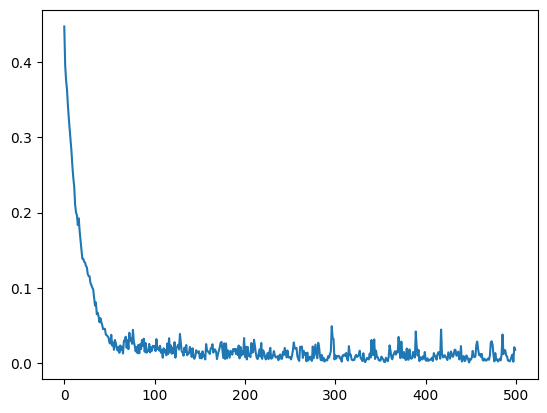

In [ ]:
# Vamos a hacer un plot del loss, a ver qué ha pasado

plt.plot(loss_history)